In [1]:
import pandas as pd
import numpy as np
# from datetime import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 72D0-BC6E

 Directory of C:\Users\GIS\Documents\A.Udemy\Python\Coursera

03/11/2021  10:01 PM    <DIR>          .
03/11/2021  10:01 PM    <DIR>          ..
03/11/2021  07:43 AM    <DIR>          .ipynb_checkpoints
05/11/2020  12:04 AM        69,333,608 202010-divvy-tripdata.csv
05/12/2020  09:08 AM        46,203,255 202011-divvy-tripdata.csv
06/01/2021  12:43 AM        25,031,027 202012-divvy-tripdata.csv
05/02/2021  08:42 AM        18,391,685 202101-divvy-tripdata.csv
10/03/2021  10:41 AM         9,365,975 202102-divvy-tripdata.csv
09/04/2021  01:17 AM        43,555,310 202103-divvy-tripdata.csv
08/05/2021  01:03 AM        64,035,536 202104-divvy-tripdata.csv
12/06/2021  01:34 AM        99,896,575 202105-divvy-tripdata.csv
16/07/2021  09:45 AM       136,439,093 202106-divvy-tripdata.csv
14/08/2021  04:42 PM       154,040,041 202107-divvy-tripdata.csv
03/09/2021  08:09 AM       150,970,305 202108-divvy-tripdata.csv
05/10/2021  0

In [3]:
# Load the processed file completed in Case_Study_1_Part_1
df = pd.read_csv("Cyclistic_202010_202109.csv")
df.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_days,riding_time
0,0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual,0,00:17:29
1,1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual,0,00:14:08
2,2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual,0,00:08:21
3,3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual,0,00:02:52
4,4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual,0,00:16:13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136261 entries, 0 to 5136260
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
 14  riding_days         int64  
 15  riding_time         object 
dtypes: float64(4), int64(2), object(10)
memory usage: 627.0+ MB


In [8]:
# Check any duplicates
df.duplicated().sum()

0

### 3-2. Add day_of_week
* day_of_week - e.g.1 = Sunday and 7 = Saturday.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136261 entries, 0 to 5136260
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
 14  riding_days         int64  
 15  riding_time         object 
dtypes: float64(4), int64(2), object(10)
memory usage: 627.0+ MB


In [12]:
# dayofweek and day_of_week - 0 = Mon, ..., 6 = Sun
# The requirement is that day_of_week needs to start from Sunday, but I still haven't found the code for it
# I will replace the code when I find  it 

# Convert started_at and ended_at into datetime as their types of data are object 
df['started_at'] =  pd.to_datetime(df['started_at'])
df['ended_at'] =  pd.to_datetime(df['ended_at'])

df['day_of_week'] = df['started_at'].dt.dayofweek
df['day_name'] = df['started_at'].dt.day_name()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_days,riding_time,day_of_week,day_name
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual,0,00:17:29,5,Saturday
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual,0,00:14:08,5,Saturday
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual,0,00:08:21,5,Saturday
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual,0,00:02:52,5,Saturday
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual,0,00:16:13,5,Saturday


In [9]:
df.drop(columns = 'Unnamed: 0', inplace = True)

# 4. Analyse

1. Find mean, max, and mode of ride length 
2. Calculate the average ride length for members and casual riders
3. Calculate the average ride length for users by day of week
4. Calculate the number of rides for users by day of week 


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136261 entries, 0 to 5136260
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  riding_days         int64         
 14  riding_time         object        
 15  day_of_week         int64         
 16  day_name            object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(9)
memory usage: 666.2+ MB


### 4-1. Find mean, max, and mode of ride length
datetime -> astype(np.int64) -> mean() -> datetime

In [13]:
# make a column called riding_time_int to save time and to calculate average time easily 
df['riding_time_int'] = pd.to_datetime(df['riding_time']).values.astype(np.int64)
# only hours and minuts contain - 00:34, 12:33 ...
df['riding_time_hm_int'] = pd.to_datetime(df.riding_time.astype(str).str[:5]).values.astype(np.int64)

In [21]:
df.member_casual.value_counts()

member    2777974
casual    2358287
Name: member_casual, dtype: int64

In [14]:
# https://stackoverflow.com/questions/52007139/get-the-average-date-from-multiple-dates-pandas
# https://stackoverflow.com/questions/54813811/how-to-compute-the-average-time-in-python-pandas
casual = df[df.member_casual == 'casual']
member = df[df.member_casual == 'member']

In [15]:
print('Mean, Max, and Mode of ride length:')

print("\nMean riding time: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))
print("Max riding time: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.max())).dt.time.astype(str).str[:8][0]))
print("Mode riding time: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.mode())).dt.time.astype(str).str[:8][0]))

print('\n-------------------------------------')
print('\nMean, Max, and Mode of ride days:')

print("\nMean riding days: {} days" .format(round(df.riding_days.mean()),2))
print("Max riding days: {} days" .format(df.riding_days.max()))
print("Mode riding days: {} days" .format(df.riding_days.mode()[0]))

Mean, Max, and Mode of ride length:

Mean riding time: 00:20:34
Max riding time: 23:59:57
Mode riding time: 00:06:25

-------------------------------------

Mean, Max, and Mode of ride days:

Mean riding days: 0 days
Max riding days: 38 days
Mode riding days: 0 days


As most of the riding_days are 0, the mean and mode of riding_days is 0.

It is intersting that 19 days is higher than 2, 3, and 4 days, and 20 days is higher than 5, 6 and 8.

Were there any promotions? 

In [16]:
df.riding_days.value_counts().head(10)

0     5132294
1        2884
19        316
2         177
3         105
4          77
20         75
5          54
6          37
8          36
Name: riding_days, dtype: int64

### 4-2. Calculate the average ride length for members and casual riders

In [17]:
print('Average riding tiem for:')
print("\ncasual riders: {}" .format(pd.Series(pd.to_datetime(casual.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))
print("members: {}" .format(pd.Series(pd.to_datetime(member.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))

Average riding tiem for:

casual riders: 00:28:18
members: 00:14:01


### 4-3. Calculate the average ride length for users by day of week

In [19]:
print("Average riding_time for users by day of week: ")
avg_rt = pd.to_datetime(df.groupby(['day_of_week', 'day_name'])['riding_time_int'].mean()).dt.time.astype(str).str[:8].reset_index()
avg_rt

Average riding_time for users by day of week: 


,day_of_week,day_name,riding_time_int
0,0,Monday,00:19:40
1,1,Tuesday,00:17:59
2,2,Wednesday,00:18:05
3,3,Thursday,00:17:33
4,4,Friday,00:19:29
5,5,Saturday,00:24:08
6,6,Sunday,00:25:08


### 4-4. Calculate the number of rides for users by day of week

In [20]:
print("Number of rides for users by day_of_week: ")
no_dow = df.groupby(['day_of_week', 'day_name'])['ride_id'].count().reset_index()
no_dow

Number of rides for users by day_of_week: 


,day_of_week,day_name,ride_id
0,0,Monday,642309
1,1,Tuesday,658378
2,2,Wednesday,680454
3,3,Thursday,695262
4,4,Friday,745342
5,5,Saturday,924170
6,6,Sunday,790346


Make users_dow so that I can easily visualise the data

In [23]:
users_dow = avg_rt.head(7)
users_dow['all_user_count'] = no_dow['ride_id']
users_dow

C:\Users\GIS\AppData\Local\Temp/ipykernel_24072/3307976670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_dow['all_user_count'] = no_dow['ride_id']


,day_of_week,day_name,riding_time_int,all_user_count
0,0,Monday,00:19:40,642309
1,1,Tuesday,00:17:59,658378
2,2,Wednesday,00:18:05,680454
3,3,Thursday,00:17:33,695262
4,4,Friday,00:19:29,745342
5,5,Saturday,00:24:08,924170
6,6,Sunday,00:25:08,790346


In [24]:
# Change the format 00:28:28 to 28.28, so I can draw plots 
users_dow['riding_time_int'] = avg_rt['riding_time_int'].str[3:].str.replace(':', '.').astype('float64')
users_dow.rename(columns = {'riding_time_int' : 'all_user_rt_mean'}, inplace=True)
users_dow

C:\Users\GIS\AppData\Local\Temp/ipykernel_24072/3550519905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_dow['riding_time_int'] = avg_rt['riding_time_int'].str[3:].str.replace(':', '.').astype('float64')
D:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,day_of_week,day_name,all_user_rt_mean,all_user_count
0,0,Monday,19.40,642309
1,1,Tuesday,17.59,658378
2,2,Wednesday,18.05,680454
3,3,Thursday,17.33,695262
4,4,Friday,19.29,745342
5,5,Saturday,24.08,924170
6,6,Sunday,25.08,790346


In [27]:
# casual riding time
c_rt = casual.groupby(['day_of_week', 'day_name'])['riding_time_int'].mean().reset_index().sort_values(by = 'day_of_week')
# casual ride count
c_rc = casual.groupby(['day_of_week', 'day_name'])['ride_id'].count().reset_index().sort_values(by = 'day_of_week')

# member rideing time
m_rt = member.groupby(['day_of_week', 'day_name'])['riding_time_int'].mean().reset_index().sort_values(by = 'day_of_week')
# member ride count
m_rc = member.groupby(['day_of_week', 'day_name'])['ride_id'].count().reset_index().sort_values(by = 'day_of_week')

In [28]:
print(c_rc.ride_id)
print(m_rc.ride_id)

0    266450
1    251510
2    257308
3    274693
4    339405
5    523875
6    445046
Name: ride_id, dtype: int64
0    375859
1    406868
2    423146
3    420569
4    405937
5    400295
6    345300
Name: ride_id, dtype: int64


In [425]:
print(users_dow.all_user_count)
c_rc.ride_id + m_rc.ride_id

0    642309
1    658378
2    680454
3    695262
4    745342
5    924170
6    790346
Name: all_user_count, dtype: int64


1    642309
5    658378
6    680454
4    695262
0    745342
2    924170
3    790346
Name: ride_id, dtype: int64

In [29]:
# casual riding time mean minutes
users_dow['casual_user_rt_mean'] = pd.to_datetime(c_rt.riding_time_int).astype(str).str[14:19].str.replace(':', '.').astype('float64')
# casual ride count
users_dow['casual_user_count'] = c_rc.ride_id

# member riding time mean minutes
users_dow['member_user_rt_mean'] = pd.to_datetime(m_rt.riding_time_int).astype(str).str[14:19].str.replace(':', '.').astype('float64')
# member ride count
users_dow['member_user_count'] = m_rc.ride_id

C:\Users\GIS\AppData\Local\Temp/ipykernel_24072/354924929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_dow['casual_user_rt_mean'] = pd.to_datetime(c_rt.riding_time_int).astype(str).str[14:19].str.replace(':', '.').astype('float64')
C:\Users\GIS\AppData\Local\Temp/ipykernel_24072/354924929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_dow['casual_user_count'] = c_rc.ride_id
C:\Users\GIS\AppData\Local\Temp/ipykernel_24072/354924929.py:7: SettingWithCopyWarning: 
A value is trying to b

In [30]:
users_dow

,day_of_week,day_name,all_user_rt_mean,all_user_count,casual_user_rt_mean,casual_user_count,member_user_rt_mean,member_user_count
0,0,Monday,19.40,642309,28.28,266450,13.26,375859
1,1,Tuesday,17.59,658378,25.52,251510,13.07,406868
2,2,Wednesday,18.05,680454,24.59,257308,13.53,423146
3,3,Thursday,17.33,695262,24.23,274693,13.05,420569
4,4,Friday,19.29,745342,26.23,339405,13.42,405937
5,5,Saturday,24.08,924170,30.46,523875,15.27,400295
6,6,Sunday,25.08,790346,32.26,445046,15.45,345300


In [34]:
# Check the number
print(users_dow.all_user_count)
users_dow.member_user_count + users_dow.casual_user_count

0    642309
1    658378
2    680454
3    695262
4    745342
5    924170
6    790346
Name: all_user_count, dtype: int64


0    642309
1    658378
2    680454
3    695262
4    745342
5    924170
6    790346
dtype: int64

# 5. Share
List of things to visualise:

0. mean, max, and mode of ride time and days - table
1. Number of memebers and casual riders - pie chart
2. top 5 mode of ridie time and days - histogram
3. the average ride length for members and casual riders - bar chart
4. the average ride length for users by day of week - line or bar chart
5. the number of rides for users by day of week - line or bar chart               
---
6. the number of members and casuals - pie chart
7. rideable_tyle - pie or bar chart
8. in which month people ride a bike most - bar chart 
9. top 5 frequent start and end station - hist


## 5-1. Number of memebers and casual riders 

In [35]:
member_types = df.member_casual.value_counts().reset_index()
member_types.rename(columns = {'index': 'type', 'member_casual': 'count'}, inplace = True)
member_types

,type,count
0,member,2777974
1,casual,2358287


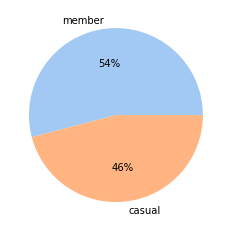

In [36]:
pie_data = member_types['count'].values
pie_labels = member_types['type'].values

colours = sns.color_palette('pastel')[0:5]

plt.pie(x = pie_data, labels = pie_labels, colors = colours, autopct='%.0f%%')
plt.show()

### 5-2. Top 5 frequent of ridie time and days

In [37]:
print(pd.to_datetime(casual.riding_time_hm_int).astype(str).str[11:16].value_counts().head())
print(pd.to_datetime(member.riding_time_hm_int).astype(str).str[11:16].value_counts().head())

00:08    96832
00:09    96780
00:07    94687
00:10    93343
00:11    89681
Name: riding_time_hm_int, dtype: int64
00:05    188620
00:06    183974
00:04    182023
00:07    171836
00:08    157018
Name: riding_time_hm_int, dtype: int64


In [38]:
rt_top_5 = pd.to_datetime(df.riding_time_hm_int).astype(str).str[11:16].value_counts().head()
rt_top_5 = pd.DataFrame(rt_top_5).reset_index().rename(columns= {'index' : 'time', 'riding_time_hm_int' : 'count'})

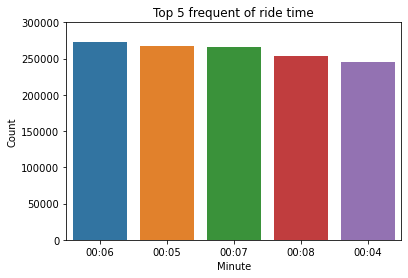

In [39]:
chart = sns.barplot(data= rt_top_5, x = 'time', y = 'count')
chart.set_title('Top 5 frequent ride times')
chart.set(xlabel = 'Minute', ylabel = 'Count', ylim = (0, 300000))
plt.show()

In casuals and members

In [40]:
casual_rt_top_5 = pd.to_datetime(casual.riding_time_hm_int).astype(str).str[11:16].value_counts().head()
casual_rt_top_5 = pd.DataFrame(casual_rt_top_5).reset_index().rename(columns= {'index' : 'time', 'riding_time_hm_int' : 'count'})

member_rt_top_5 = pd.to_datetime(member.riding_time_hm_int).astype(str).str[11:16].value_counts().head()
member_rt_top_5 = pd.DataFrame(member_rt_top_5).reset_index().rename(columns= {'index' : 'time', 'riding_time_hm_int' : 'count'})

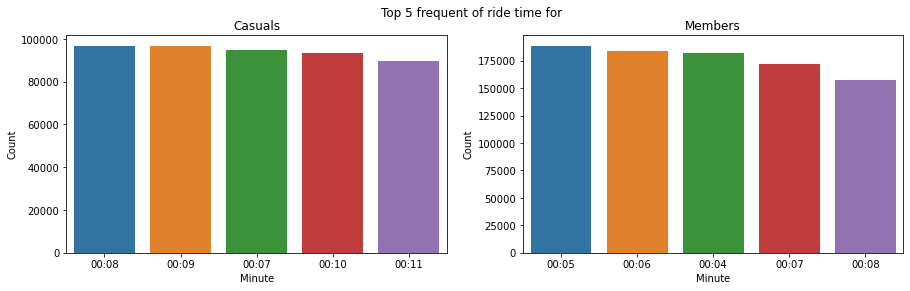

In [41]:
fig, axes = plt.subplots(1, 2, figsize = (15, 4))
fig.suptitle('Top 5 frequent of ride time for')

sns.barplot(ax = axes[0], data= casual_rt_top_5, x = 'time', y = 'count')
axes[0].set_title('Casuals')
axes[0].set(xlabel = 'Minute', ylabel = 'Count')

sns.barplot(ax = axes[1], data= member_rt_top_5, x = 'time', y = 'count')
axes[1].set_title('Members')
axes[1].set(xlabel = 'Minute', ylabel = 'Count')

plt.show()

### 5-3. Average ride length for members and casual riders

In [53]:
print("All riders: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))
print("casual riders: {}" .format(pd.Series(pd.to_datetime(casual.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))
print("members: {}" .format(pd.Series(pd.to_datetime(member.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))

All riders: 00:20:34
casual riders: 00:28:18
members: 00:14:01


In [43]:
plt_df = pd.DataFrame(data = {'type' : ['casual', 'member'], 'time' : ['00:28:18', '00:14:01']})
plt_df['minutes'] = plt_df.time.str[3:5].astype('int64')
plt_df

,type,time,minutes
0,casual,00:28:18,28
1,member,00:14:01,14


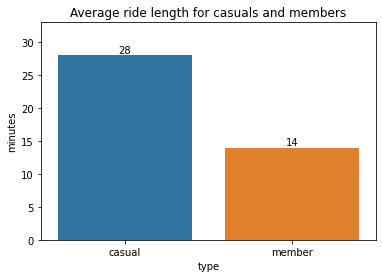

In [44]:
# casual_rt_mean = pd.Series(pd.to_datetime(casual.riding_time_int.mean())).dt.time.astype(str).str[:8]
# member_rt_mean = pd.Series(pd.to_datetime(member.riding_time_int.mean())).dt.time.astype(str).str[:8]
chart = sns.barplot(x = plt_df['type'], y = plt_df['minutes'])
chart.set_title("Average ride length for casuals and members")
chart.set_ylim(0,33)
for p in chart.patches:
    chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
    textcoords='offset points')
plt.show()

### 5-4. Average ride length for users by day of week - line or bar chart

    day_name  all_user_rt_mean
0     Monday             19.40
1    Tuesday             17.59
2  Wednesday             18.05
3   Thursday             17.33
4     Friday             19.29
5   Saturday             24.08
6     Sunday             25.08


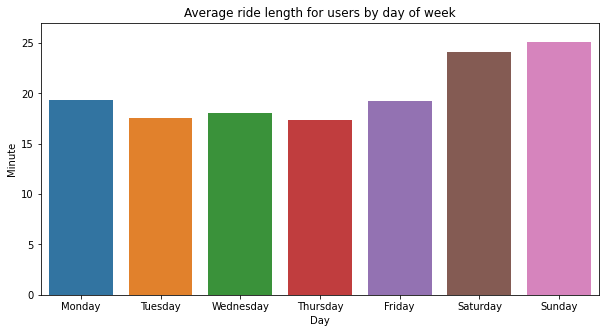

In [56]:
print(users_dow[['day_name', 'all_user_rt_mean']])

fig, axes = plt.subplots(1,1, figsize = (10, 5))
chart = sns.barplot(x = users_dow.day_name, y = users_dow.all_user_rt_mean)
chart.set_title("Average ride length for users by day of week")
chart.set(xlabel = 'Day', ylabel = 'Minute', ylim = (0, 27))
plt.show()

    day_name  casual_user_rt_mean  member_user_rt_mean
0     Monday                28.28                13.26
1    Tuesday                25.52                13.07
2  Wednesday                24.59                13.53
3   Thursday                24.23                13.05
4     Friday                26.23                13.42
5   Saturday                30.46                15.27
6     Sunday                32.26                15.45


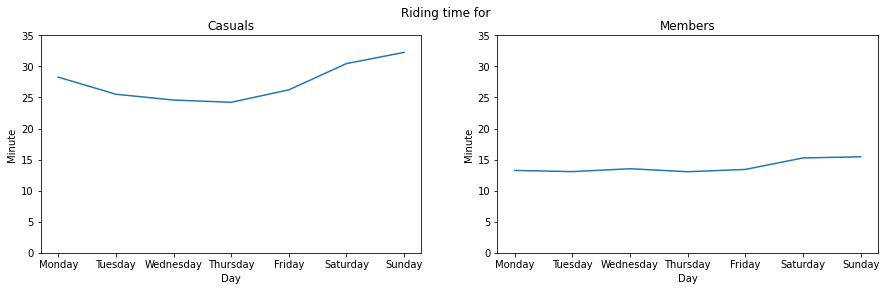

In [55]:
print(users_dow[['day_name', 'casual_user_rt_mean', 'member_user_rt_mean']])

fig, axes = plt.subplots(1,2, figsize = (15, 4))
fig.suptitle('Riding time for')

sns.lineplot(ax = axes[0], x = users_dow.day_name, y = users_dow.casual_user_rt_mean)
axes[0].set_title('Casuals')
axes[0].set(xlabel = 'Day', ylabel = 'Minute', ylim = (0, 35))

sns.lineplot(ax = axes[1], x = users_dow.day_name, y = users_dow.member_user_rt_mean)
axes[1].set_title('Members')
axes[1].set(xlabel = 'Day', ylabel = 'Minute', ylim = (0, 35))
plt.show()

### 5-5. Number of rides for users by day of week - line or bar chart

    day_name  all_user_count
0     Monday          642309
1    Tuesday          658378
2  Wednesday          680454
3   Thursday          695262
4     Friday          745342
5   Saturday          924170
6     Sunday          790346


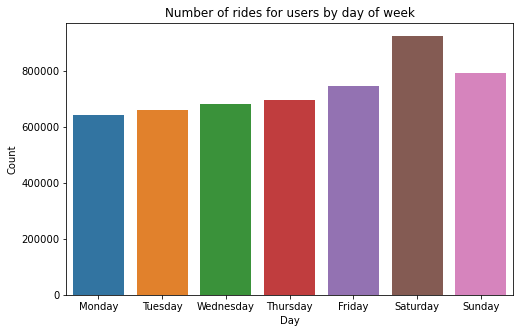

In [58]:
print(users_dow[['day_name', 'all_user_count']])

fig, axes = plt.subplots(1,1, figsize = (8, 5))

# chart = sns.lineplot(x = users_dow.day_name, y = users_dow.all_user_count)
chart = sns.barplot(x = users_dow.day_name, y = users_dow.all_user_count)
chart.set_title('Number of rides for users by day of week')
chart.set(xlabel = "Day", ylabel = "Count")

plt.show()

    day_name  casual_user_count  member_user_count
0     Monday             266450             375859
1    Tuesday             251510             406868
2  Wednesday             257308             423146
3   Thursday             274693             420569
4     Friday             339405             405937
5   Saturday             523875             400295
6     Sunday             445046             345300


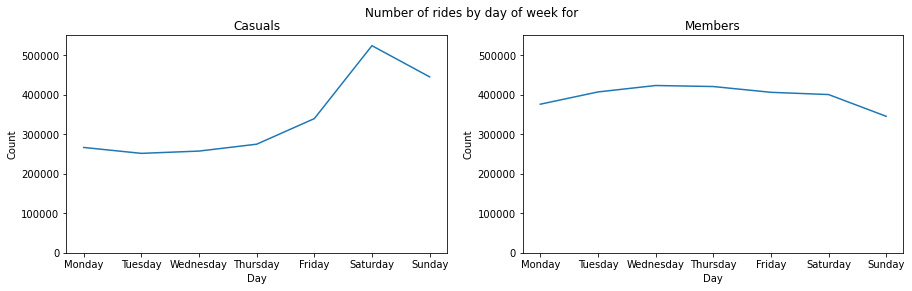

In [59]:
print(users_dow[['day_name', 'casual_user_count', 'member_user_count']])

fig, axes = plt.subplots(1,2, figsize = (15, 4))
fig.suptitle('Number of rides by day of week for')

sns.lineplot(ax = axes[0], x = users_dow.day_name, y = users_dow.casual_user_count)
axes[0].set_title('Casuals')
axes[0].set(xlabel = 'Day', ylabel = 'Count', ylim = (0, 550000))

sns.lineplot(ax = axes[1], x = users_dow.day_name, y = users_dow.member_user_count)
axes[1].set_title('Members')
axes[1].set(xlabel = 'Day', ylabel = 'Count', ylim = (0, 550000))
plt.show()

In [54]:
users_dow

,day_of_week,day_name,all_user_rt_mean,all_user_count,casual_user_rt_mean,casual_user_count,member_user_rt_mean,member_user_count
0,0,Monday,19.40,642309,28.28,266450,13.26,375859
1,1,Tuesday,17.59,658378,25.52,251510,13.07,406868
2,2,Wednesday,18.05,680454,24.59,257308,13.53,423146
3,3,Thursday,17.33,695262,24.23,274693,13.05,420569
4,4,Friday,19.29,745342,26.23,339405,13.42,405937
5,5,Saturday,24.08,924170,30.46,523875,15.27,400295
6,6,Sunday,25.08,790346,32.26,445046,15.45,345300


# 6. Act 

The question is **How do annual members and casual riders use Cyclistic bikes differently?**

1. The 5 most frequent riding times in casual users and members are between 4 and 11 minutes. 
2. The casual riders use cycles significantly more on Saturdays and Sundays, whereas the members use cycles steadily and constantly every week. 
3. The casual users ride cycles (24 - 32 mins) longer than the members (13 - 15 mins).